In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lib.helper_functions import *

import warnings
warnings.filterwarnings("ignore")

In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [53]:
pd.set_option('display.max_columns', None) 

In [54]:
df = pd.read_csv('data/philosophy_data.csv')

In [55]:
df.head();

In [56]:
i = []

for string in df['sentence_lowered']:
    i.append(count_words(string))

df['word_count'] = i

In [57]:
df.isnull().sum();

In [58]:
df.loc[df['sentence_lowered'].duplicated(keep=False), :];

In [59]:
df2 = df.drop_duplicates('sentence_lowered');

In [60]:
# from transformers import pipeline
# sentiment_pipeline = pipeline("sentiment-analysis")

# sentiment = []
# index = -1
# for sentence in df2['sentence_lowered']:
#     index+=1
#     if(index%10000 == 0):
#         print(index)

#     result = sentiment_pipeline(sentence[:512])[0]
#     sentiment.append(result['score'])
#df2['sentiment_score'] = sentiment

In [61]:
#df2.to_csv('output\sentiment_data.csv')
df2 = pd.read_csv('output\sentiment_data.csv')

In [62]:
len(df2['author'].unique());
df2['author'].value_counts();

In [63]:
len(df2['school'].unique());
df2['school'].value_counts();

Text(0.5, 1.0, 'Number of Publication by Author')

<AxesSubplot:title={'center':'Number of Publication by Author'}, xlabel='count', ylabel='author'>

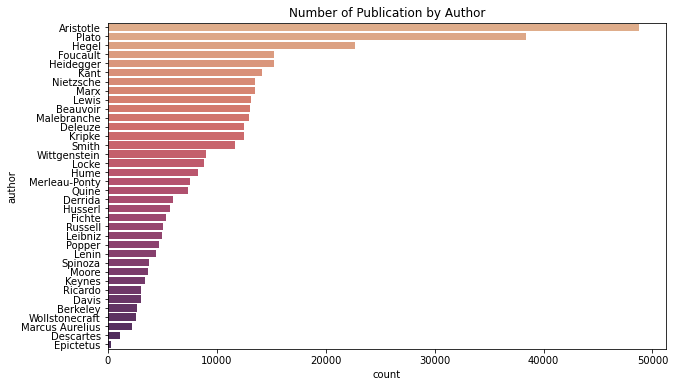

In [64]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Number of Publication by Author')
sns.countplot(y = 'author', data = df2, order = df2['author'].value_counts().index, palette = 'flare')

Text(0.5, 1.0, 'Number of Contributions to the School of Thought')

<AxesSubplot:title={'center':'Number of Contributions to the School of Thought'}, xlabel='count', ylabel='school'>

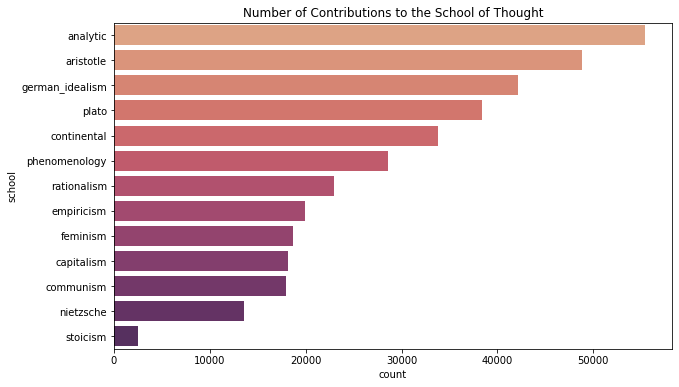

In [65]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Number of Contributions to the School of Thought')
sns.countplot(y = 'school', data = df2, order = df2['school'].value_counts().index, palette = 'flare')

Text(0.5, 1.0, 'Amount of Philosophical Publications Over Time - Modern')

<AxesSubplot:title={'center':'Amount of Philosophical Publications Over Time - Modern'}, xlabel='original_publication_date', ylabel='Count'>

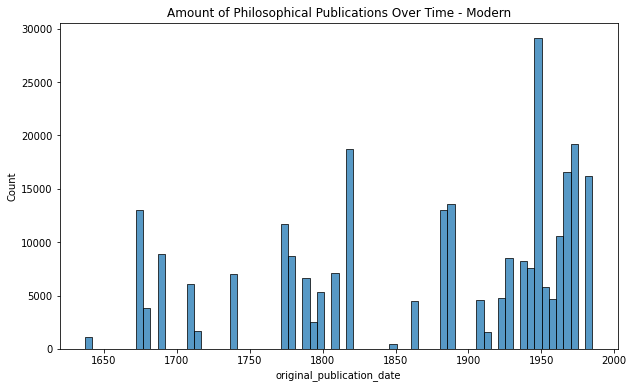

In [67]:
df3 = df2[df2['original_publication_date'] >= 1500]
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Amount of Philosophical Publications Over Time - Modern')
sns.histplot(x='original_publication_date', data = df3)

# Analysis by Ancient vs Modern

In [68]:
df_ancient = df2[df2['original_publication_date'] < 1000] #ancient philosophers
df_modern = df2[df2['original_publication_date'] >= 1000] #modern philosophers

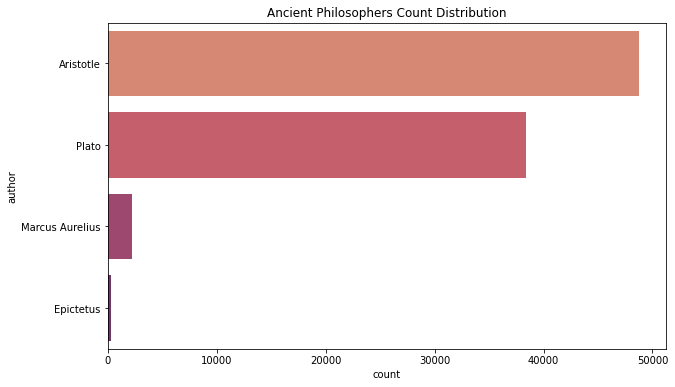

In [69]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Ancient Philosophers Count Distribution')
sns.countplot(y = 'author', data = df_ancient, order = df_ancient['author'].value_counts().index, palette = 'flare');

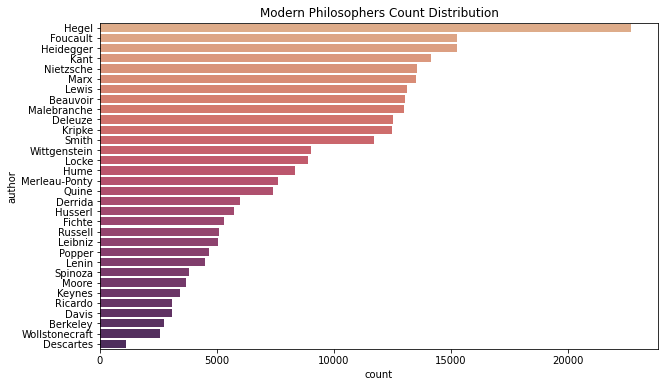

In [70]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Modern Philosophers Count Distribution')
sns.countplot(y = 'author', data = df_modern, order = df_modern['author'].value_counts().index, palette = 'flare');

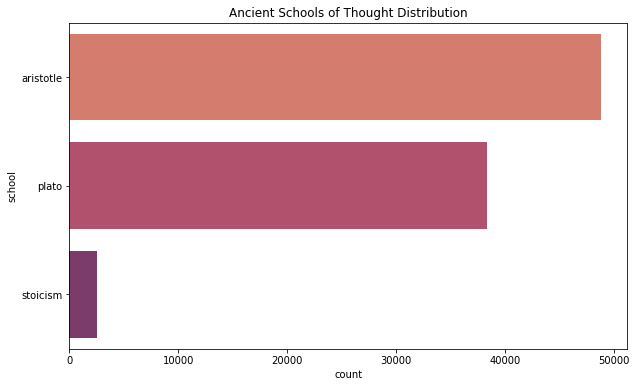

In [71]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Ancient Schools of Thought Distribution')
sns.countplot(y = 'school', data = df_ancient, order = df_ancient['school'].value_counts().index, palette = 'flare');

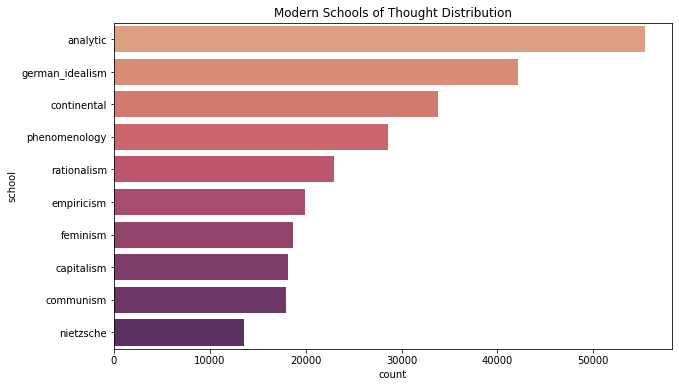

In [72]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Modern Schools of Thought Distribution')
sns.countplot(y = 'school', data = df_modern, order = df_modern['school'].value_counts().index, palette = 'flare');

# Analysis by Authors

In [73]:
df_wordcount = df2.groupby(['author'])['word_count'].mean().reset_index()
df_sentenelength = df2.groupby(['author'])['sentence_length'].mean().reset_index()

<AxesSubplot:xlabel='author', ylabel='word_count'>

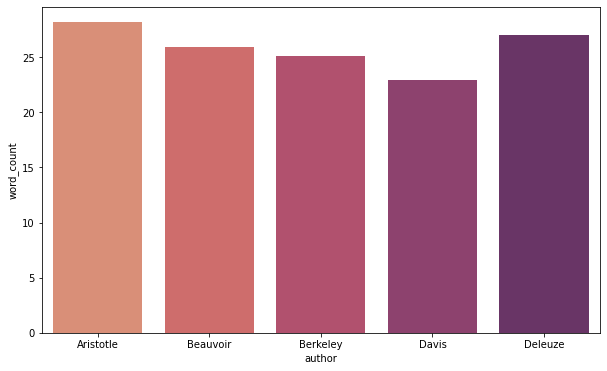

In [74]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
#plt.bar(df_wordcount['author'], df_wordcount['word_count'], width = 0.6)

sns.barplot(x = df_wordcount['author'][0:5], y = df_wordcount['word_count'][0:5], palette = 'flare')

<AxesSubplot:xlabel='author', ylabel='word_count'>

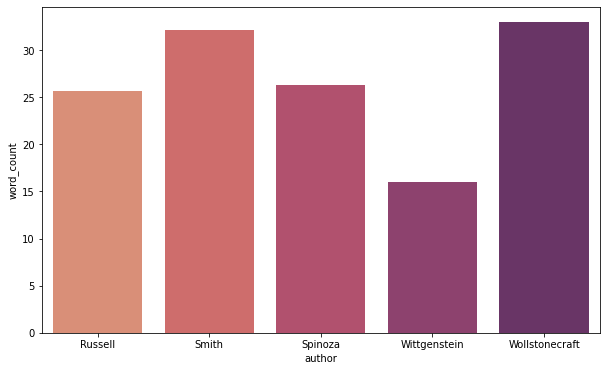

In [75]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
#plt.bar(df_wordcount['author'], df_wordcount['word_count'], width = 0.6)

sns.barplot(x = df_wordcount['author'][31:36], y = df_wordcount['word_count'][31:36], palette = 'flare')

# Analysis by School

In [76]:
df_test = df2.groupby(["school"])['author'].nunique().reset_index()
df_test

,school,author
0,analytic,7
1,aristotle,1
2,capitalism,3
3,communism,2
4,continental,3
5,empiricism,3
6,feminism,3
7,german_idealism,3
8,nietzsche,1
9,phenomenology,3


In [77]:
df_analytic = df2[df2['school'] == 'analytic']
df_german_idealism = df2[df2['school'] == 'german_idealism']
df_continental = df2[df2['school'] == 'continental']
df_phenomenology = df2[df2['school'] == 'phenomenology']
df_rationalism = df2[df2['school'] == 'rationalism']
df_empiricism = df2[df2['school'] == 'empiricism']
df_feminism = df2[df2['school'] == 'feminism']
df_capitalism = df2[df2['school'] == 'capitalism']
df_communism = df2[df2['school'] == 'communism']
df_nietzsche = df2[df2['school'] == 'nietzsche']
df_aristotle = df2[df2['school'] == 'aristotle']
df_plato = df2[df2['school'] == 'plato']
df_stoicism = df2[df2['school'] == 'stoicism']


## Authors in Schools

<AxesSubplot:xlabel='count', ylabel='author'>

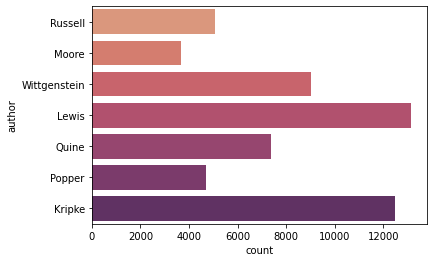

In [78]:
sns.countplot(y = 'author', data = df_analytic, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

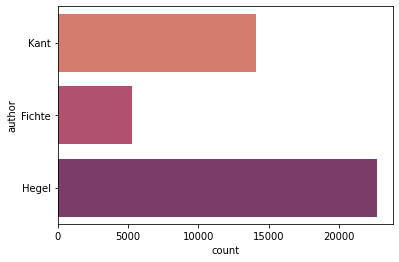

In [79]:
sns.countplot(y = 'author', data = df_german_idealism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

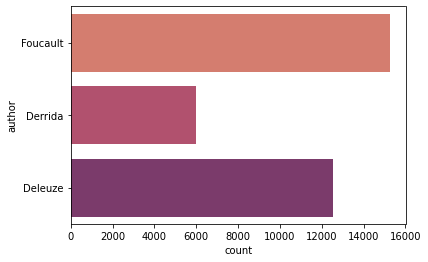

In [80]:
sns.countplot(y = 'author', data = df_continental, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

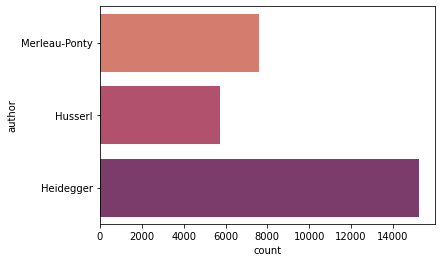

In [81]:
sns.countplot(y = 'author', data = df_phenomenology, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

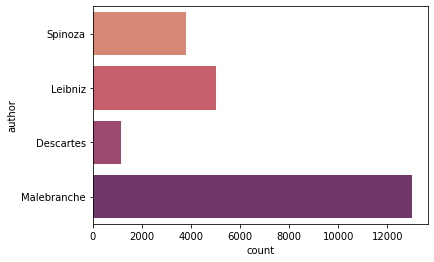

In [82]:
sns.countplot(y = 'author', data = df_rationalism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

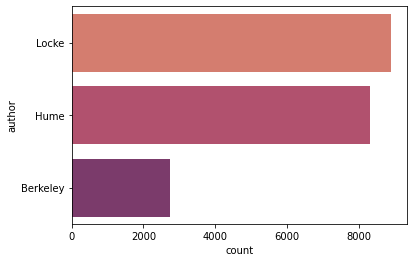

In [83]:
sns.countplot(y = 'author', data = df_empiricism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

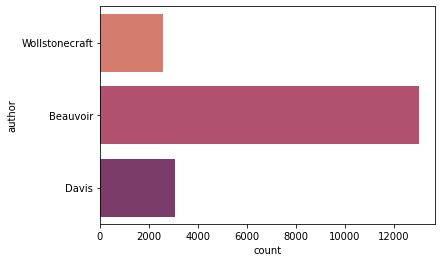

In [84]:
sns.countplot(y = 'author', data = df_feminism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

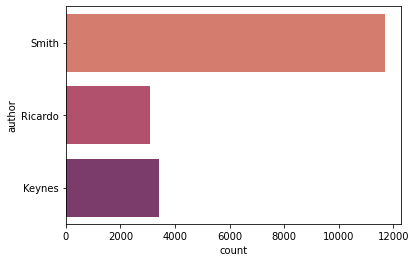

In [85]:
sns.countplot(y = 'author', data = df_capitalism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

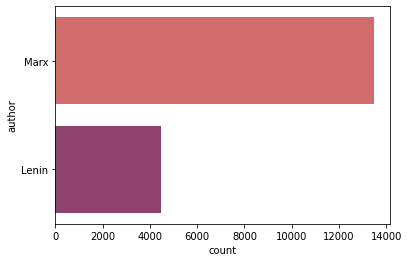

In [86]:
sns.countplot(y = 'author', data = df_communism, palette = 'flare')

In [87]:
#sns.countplot(y = 'author', data = df_nietzsche, palette = 'flare');

In [88]:
#sns.countplot(y = 'author', data = df_aristotle, palette = 'flare');

In [89]:
#sns.countplot(y = 'author', data = df_plato, palette = 'flare');

<AxesSubplot:xlabel='count', ylabel='author'>

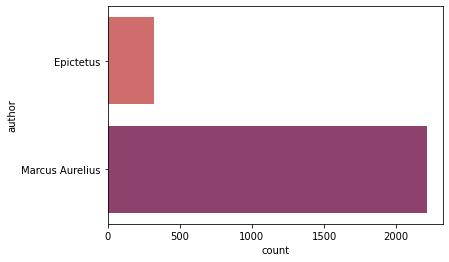

In [90]:
sns.countplot(y = 'author', data = df_stoicism, palette = 'flare')

## Analysis by Schools

In [91]:
df_time = df_modern.groupby(["school",'original_publication_date'])['author'].count().reset_index()

df_time_1900 = df_time[df_time['original_publication_date'] >= 1900]
df_time_1900 = pd.concat([df_time[df_time['school'] == 'feminism'], df_time_1900])
df_time_1900 = df_time_1900[df_time_1900['school'] != 'capitalism']
df_time_1900 = df_time_1900.drop_duplicates()

df_time_1850 = df_time[df_time['original_publication_date'] <= 1850]
df_time_1850 = df_time_1850[df_time_1850['school'] != 'capitalism']
df_time_1850 = df_time_1850[df_time_1850['school'] != 'communism']
df_time_1850 = df_time_1850[df_time_1850['school'] != 'feminism']

df_time_2 = pd.concat([df_time[df_time['school'] == 'communism'], df_time[df_time['school'] == 'capitalism']])

In [92]:
# fig,ax = plt.subplots()
# fig.set_size_inches(10,6)
# sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time);

<AxesSubplot:xlabel='original_publication_date', ylabel='author'>

(1900.0, 1994.65)

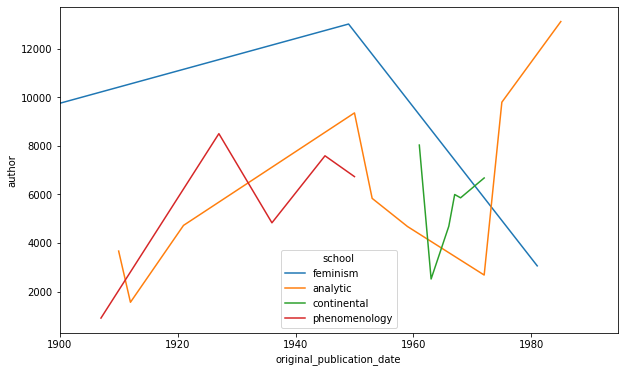

In [93]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_1900)
ax.set_xlim(1900, )

<AxesSubplot:xlabel='original_publication_date', ylabel='author'>

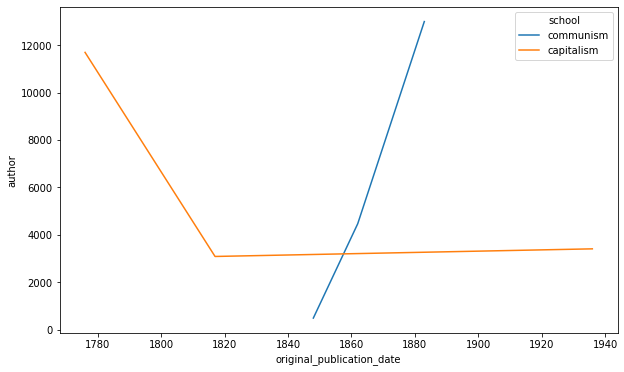

In [94]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_2)

<AxesSubplot:xlabel='original_publication_date', ylabel='author'>

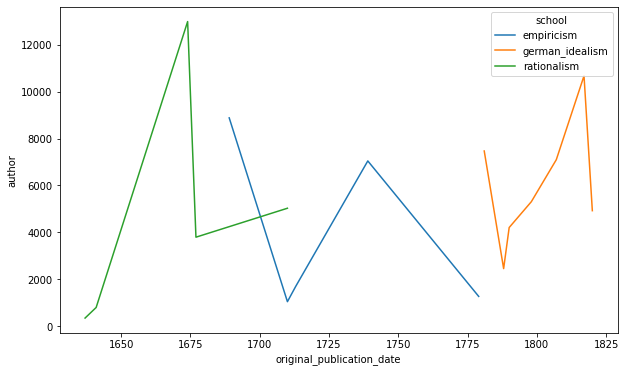

In [95]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_1850)

# Sentiment Analysis

In [96]:
sentiment = []

for score in df2['sentiment_score']:
    if score >= 0.7:
        sentiment.append('Good')
    elif score <= 0.3:
        sentiment.append('Bad')
    else:
        sentiment.append('Neutral')
        
df2['sentiment'] = sentiment

In [97]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [98]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Frequent words',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'height': 1200,
    'paper_bgcolor': 'rgb(233,233,233)',
    'template': '...',
    'title': {'text': 'Word Count Plots'},
    'width': 900,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}
})

In [99]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(5), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=450, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Frequent words',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'height': 600,
    'paper_bgcolor': 'rgb(233,233,233)',
    'template': '...',
    'title': {'text': 'Word Count Plots'},
    'width': 450,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}
})

In [100]:
# classify how people think about the world
# how the topics of discussions have changed over time
# what certain authors' were concerned about the most
# how the sentiment of a certain topic changed over time
# how the sentiment of a certain topic changed over time - hue authors
# the author's sentence type (length, their frequently used vocab)
# what where the most firmly held beliefs.
#Clustering
#google how to hide jupyter notebook code
